# Comparison of frontier model selection methods

## Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import *
import json

In [2]:
data_loc = 'data/All ML Systems - full view.csv'
dtypes = {
    'Training compute (FLOP)': np.float64,
}
pcd_df = pd.read_csv(data_loc, dtype=dtypes)
pcd_df.dropna(subset=['Publication date', 'Notability criteria', 'Training compute (FLOP)'], inplace=True)
decimal_year = lambda df: pd.to_datetime(df['Publication date']).dt.year + (pd.to_datetime(df['Publication date']).dt.month - 1) / 12 + (pd.to_datetime(df['Publication date']).dt.day - 1) / 365
pcd_df['Decimal year'] = decimal_year(pcd_df)

In [3]:
files = ['top_n', 'residual_from_trend', 'window_percentile', 'backward_window_percentile']

In [4]:
models = {}
for file in files:
    with open(f'data/frontier_systems_by_{file}.json') as f:
        models[file] = json.load(f)

In [5]:
models['top_n']

{'1': ['AlphaGo Lee',
  'AlphaGo Master',
  'AlphaGo Zero',
  'GNMT',
  'GPT-4',
  'Gemini 1.0 Ultra',
  'Megatron-Turing NLG 530B',
  'Minerva (540B)',
  'PaLM (540B)'],
 '2': ['ERNIE 3.0 Titan',
  'GPT-3 175B (davinci)',
  'GPT-3.5 (text-davinci-003)',
  'Gopher (280B)',
  'Inflection-2',
  'NASv3 (CIFAR-10)',
  'PaLM 2',
  'U-PaLM (540B)',
  'Yuan 1.0'],
 '3': ['AlphaZero',
  'Claude 2',
  'DeepSpeech2 (English)',
  'GLaM',
  'Meena',
  'Megatron-BERT',
  'OpenAI Five',
  'Xception'],
 '4': ['AlphaStar',
  'Chinchilla',
  'Falcon-180B',
  'Flan-PaLM 540B',
  'HyperCLOVA 82B',
  'ResNeXt-101 32x48d'],
 '5': ['FTW',
  'Grok-1',
  'JFT',
  'LaMDA',
  'Libratus',
  'Megatron-LM (8.3B)',
  'ResNet-152 (ImageNet)',
  'Switch',
  'T5-11B',
  'mT5-XXL'],
 '6': ['OPT-175B', 'OpenAI TI7 DOTA 1v1', 'PolyNet'],
 '7': ['ByT5-XXL', 'GPT-2 (1.5B)', 'Parti', 'ProtT5-XXL'],
 '8': ['BLOOM-176B',
  'BlenderBot 3',
  'GOAT',
  'MoE',
  'OpenAI Five Rerun',
  'XLNet'],
 '9': ['AlphaCode',
  'BigGAN-deep

## Plot models selected by each method

In [6]:
models_top_n = list_models(select_models(models['top_n'], 10, ascending=False))
models_residual_from_trend = list_models(select_models(models['residual_from_trend'], 80))
models_window_percentile = list_models(select_models(models['window_percentile'], 80))
models_backward_window_percentile = list_models(select_models(models['backward_window_percentile'], 80))

In [7]:
# selections = [models_top_n, models_residual_from_trend, models_window_percentile, models_backward_window_percentile]
# dataframes = []
pcd_df = pcd_df[(pcd_df['Decimal year'] > 2015.75) & (pcd_df['Decimal year'] < 2024)]
# for method in selections:
#     df = pcd_df[pcd_df['System'].isin(method)]
#     dataframes.append(df)

In [8]:
results_dirs = ['top_n=10', 'residual_from_trend=80', 'window_percentile=80', 'backward_window_percentile=85']
results_dirs = ['hardware-capex-energy-'+_+'-original' for _ in results_dirs]
price_dfs = [pd.read_csv(f'results/{path}/cost_dataset.csv') for path in results_dirs]
for i in range(4):
    price_dfs[i]['Decimal year'] = decimal_year(price_dfs[i])
    print(price_dfs[i]['Cost (inflation-adjusted)'].notna().sum())

45
50
46
47


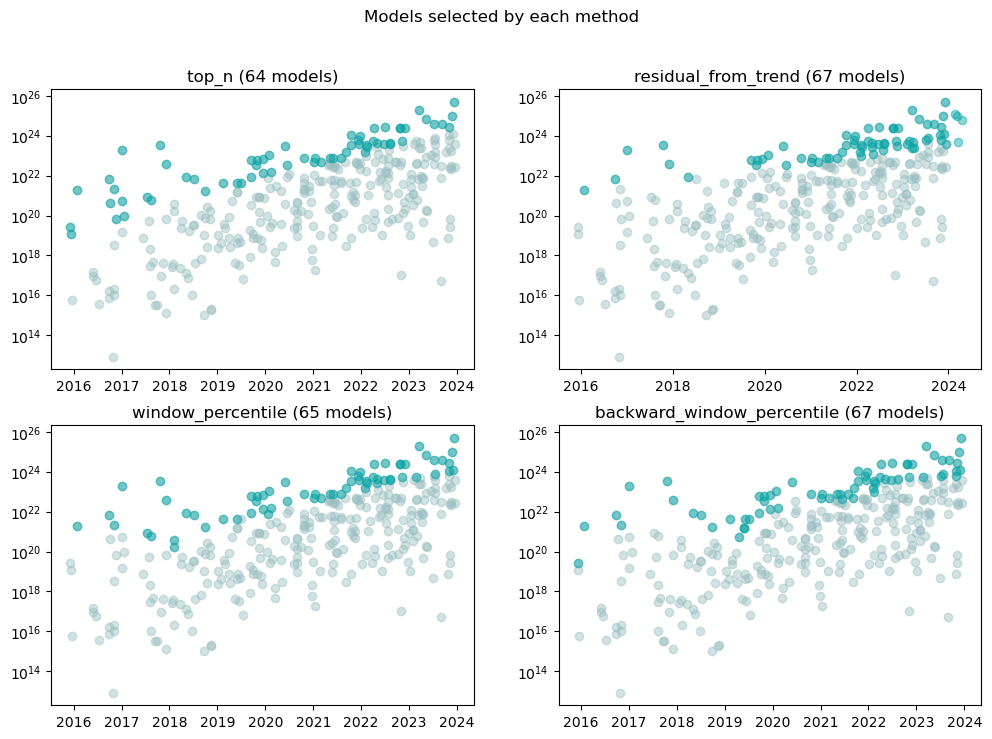

In [9]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
axes = [ax1, ax2, ax3, ax4]
fig.suptitle('Models selected by each method')

for i in range(4):
    data = price_dfs[i]
    data = data[data['Decimal year'] > 2015.75]
    x = data['Decimal year']
    y = data['Training compute (FLOP)']
    n = y.notna().sum()
    axes[i].scatter(pcd_df['Decimal year'], pcd_df['Training compute (FLOP)'], color='#9BBFC1', alpha=0.45)
    axes[i].scatter(x, y, color='#00A5A6', alpha=0.45)
    axes[i].set_yscale('log')
    axes[i].set_title(files[i] + f' ({n} models)')
plt.show()

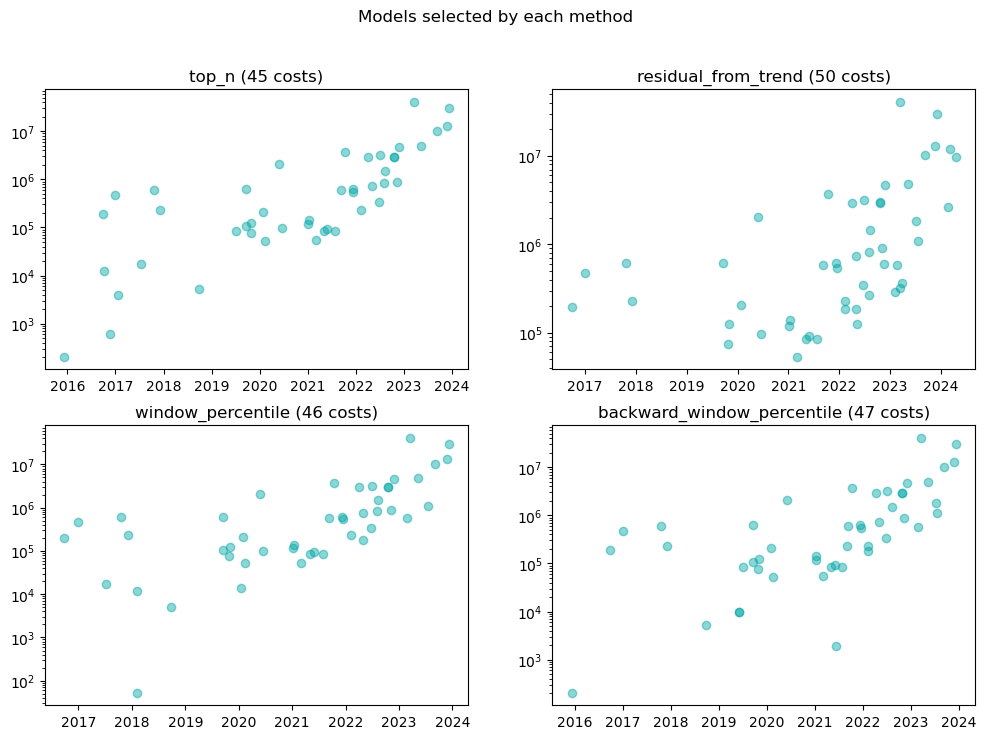

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 8))
axes = [ax1, ax2, ax3, ax4]
fig.suptitle('Models selected by each method')

for i in range(4):
    data = price_dfs[i]
    x = data['Decimal year']
    y = data['Cost (inflation-adjusted)']
    n = y.notna().sum()
    axes[i].scatter(x, y, color='#00A5A6', alpha=0.45)
    axes[i].set_yscale('log')
    axes[i].set_title(files[i] + f' ({n} costs)')
plt.show()